Author: Daniel Abadjiev  
&nbsp;&nbsp;&nbsp; with lots of help from Eliza  
Date: June 3, 2025  
Description: a notebook to test some stuff with smartpixels data and get a handle on the data format/machine learning general things.   

Will partially follow Eliza's github, will also follow this tutorial https://www.tensorflow.org/tutorials/keras/classification

In [25]:
from OptimizedDataGenerator4 import *
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# data_dir = "../smartpixML/MuonColliderSim/Simulation_Output/";
# tf_dir = "./tfRecDirDaniel"
# labels_dir = "./labelsDirDaniel" #leftover 
# dataFormatter = OptimizedDataGenerator(
#     tf_records_dir=tf_dir,
#     # data_directory_path=data_dir,
#     # file_type="parquet",
#     load_records=True,
#     muon_collider=True,
#     x_feature_description=['cluster','x_profile','x_size'],
#     batch_size=3000,
#     filteringBIB=True
#     )
# dataFormatter.tfrecord_filenames.size

In [27]:
# print(dataFormatter)
# # print(dataFormatter.x_features)
# print(dataFormatter.x_feature_description)
# # dataFormatter.x_features['x_profile']
# print(dataFormatter.x_features['x_size'])
# print(np.shape(dataFormatter.x_features['x_size']))
# print(dataFormatter.labels)
# # plt.plot(dataFormatter.labels)
# model.fit(x=dataFormatter.x_features['x_size'],y=dataFormatter.labels)

In [65]:
validation_dir = "./tf_records1000Daniel/tfrecords_validation/"
train_dir = "./tf_records1000Daniel/tfrecords_train/"
x_feature_description: list = ['x_size','z_global','y_profile','x_profile','cluster']
trainODG = OptimizedDataGenerator(tf_records_dir=train_dir,load_records=True, x_feature_description=x_feature_description)
validationODG = OptimizedDataGenerator(tf_records_dir=validation_dir,load_records=True, x_feature_description=x_feature_description)
# trainODG._parse_tfrecord_fn()

In [41]:

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(None,1), name="z_global"),
    # tf.keras.layers.Input(shape=(13,), name="y_profile"),
    # tf.keras.layers.Dense(128,activation='relu'),
    # tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
callbacks=[]
learningRates = [0.1,0.9,0.6,0.3,0.1,0.03,0.01,0.001,0.0001,0.00001,0.000001]
callbacks.append(tf.keras.callbacks.LearningRateScheduler(lambda epoch,lr : lr if epoch<5 else lr*np.exp(-0.1)))
callbacks=[]
history = model.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=100)



Epoch 1/100


/home/dabadjiev/.local/lib/python3.9/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: z_global
Received: inputs=['Tensor(shape=(None, 1))']
  warnings.warn(msg)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 340ms/step - binary_accuracy: 0.6518 - loss: 0.6825 - val_binary_accuracy: 0.4445 - val_loss: 0.6917
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - binary_accuracy: 0.3155 - loss: 0.7009 - val_binary_accuracy: 0.4445 - val_loss: 0.6912
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - binary_accuracy: 0.3477 - loss: 0.6973 - val_binary_accuracy: 0.4547 - val_loss: 0.6909
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - binary_accuracy: 0.5364 - loss: 0.6859 - val_binary_accuracy: 0.4606 - val_loss: 0.6907
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - binary_accuracy: 0.4274 - loss: 0.6931 - val_binary_accuracy: 0.4685 - val_loss: 0.6905
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - binary_accuracy: 0.2812 - loss: 0.7033 - val_binary_accuracy: 0.4923 - val_loss: 0.6901
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - binary_accuracy: 0.5584 - loss: 0.6857 - val_binary_accuracy: 0.4934 - val_loss: 0.6900
Epoch 8/100
6/6 ━━━━━━━━━

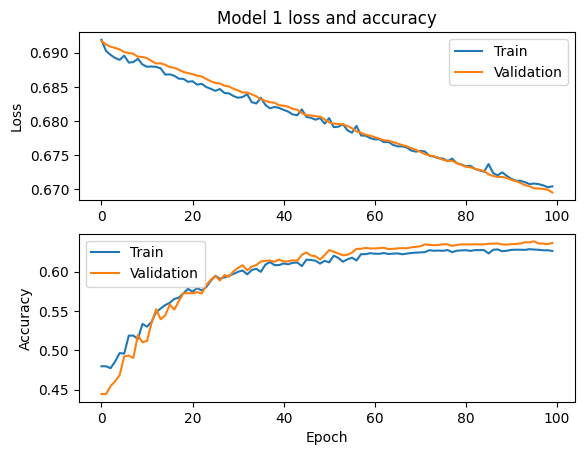

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, None, 10)       │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, None, 1)        │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [50]:
#// plotting code from google ai https://www.google.com/search?client=firefox-b-1-d&q=plot+tensorflow+model+history
# then modified
def plotModelHistory(history,modelNum = -999):
    plt.subplot(211)
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model {modelNum} loss and accuracy')
    plt.ylabel('Loss')
    # plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.subplot(212)
    # Plot training & validation accuracy values
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    # plt.title(f'Model {modelNum} accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
plotModelHistory(history,1)
model.summary()

In [49]:
test_loss, test_acc = model.evaluate(validationODG)
print("test accuracy: "+str(test_acc))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - binary_accuracy: 0.6365 - loss: 0.6683
test accuracy: 0.6361817121505737


In [32]:
#Make a model that has multpile layers
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
inputList = [input1, input2]
inputs = tf.keras.layers.Concatenate()(inputList)
stack = tf.keras.layers.Dense(10,activation='relu')(inputs)
stack = tf.keras.layers.Dense(10)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model2 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
# callbacks=[]
# learningRates = [0.1,0.9,0.6,0.3,0.1,0.03,0.01,0.001,0.0001,0.00001,0.000001]
# callbacks.append(tf.keras.callbacks.LearningRateScheduler(lambda epoch,lr : lr if epoch<5 else lr*np.exp(-0.1)))
# callbacks=[]
history2 = model2.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=100)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - binary_accuracy: 0.5703 - loss: 0.7038 - val_binary_accuracy: 0.5555 - val_loss: 0.6976
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.3864 - loss: 0.7072 - val_binary_accuracy: 0.5676 - val_loss: 0.6912
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.5129 - loss: 0.6932 - val_binary_accuracy: 0.5784 - val_loss: 0.6862
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.5602 - loss: 0.6859 - val_binary_accuracy: 0.6800 - val_loss: 0.6806
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.6732 - loss: 0.6812 - val_binary_accuracy: 0.6857 - val_loss: 0.6752
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.6781 - loss: 0.6761 - val_binary_accuracy: 0.7001 - val_loss: 0.6691
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - binary_accuracy: 0.6599 - loss: 0.6698 - val_binary_accuracy: 0.6678 - val_loss: 0.6643
Epoch 

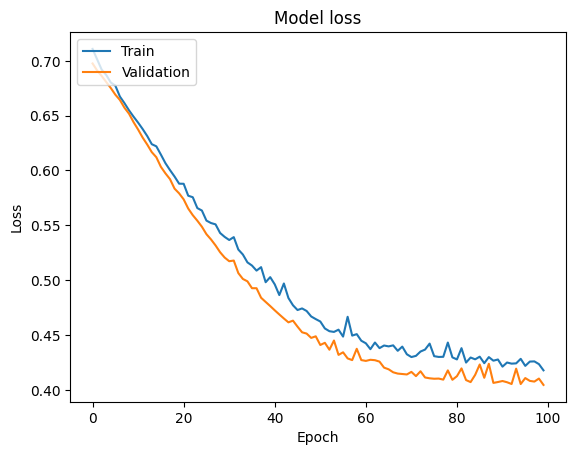

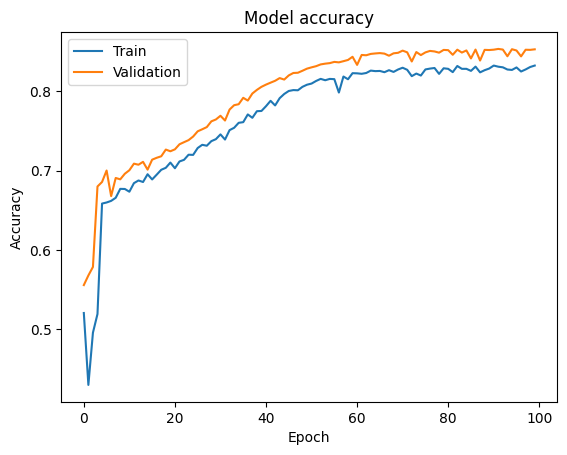

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ z_global            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ x_size (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 2)         │          0 │ z_global[0][0],   │
│ (Concatenate)       │                   │            │ x_size[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 10)        │         30 │ concatenate_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 10)        │        110 │ dense_30[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 1)         │         11 │ dense_31[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 455 (1.78 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304 (1.19 KB)

In [ ]:
plotModelHistory(history2,2)
model2.summary()


In [51]:
#Make a model that has multpile layers
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
input3 = tf.keras.layers.Input(shape=(21,), name="x_profile")
input4 = tf.keras.layers.Input(shape=(13,), name="y_profile")
inputList = [input1, input2,input3,input4]
inputs = tf.keras.layers.Concatenate()(inputList)
stack = tf.keras.layers.Dense(10,activation='relu')(inputs)
stack = tf.keras.layers.Dense(10)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model3 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
# callbacks=[]
# learningRates = [0.1,0.9,0.6,0.3,0.1,0.03,0.01,0.001,0.0001,0.00001,0.000001]
# callbacks.append(tf.keras.callbacks.LearningRateScheduler(lambda epoch,lr : lr if epoch<5 else lr*np.exp(-0.1)))
# callbacks=[]
history3 = model3.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=150)

Epoch 1/150


2025-06-11 15:31:43.991771: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_387', 180 bytes spill stores, 180 bytes spill loads

2025-06-11 15:31:43.991794: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_387_0', 136 bytes spill stores, 136 bytes spill loads

2025-06-11 15:31:44.040500: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_387', 180 bytes spill stores, 180 bytes spill loads

2025-06-11 15:31:44.719704: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_387', 1520 bytes spill stores, 1520 bytes spill loads



1/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - binary_accuracy: 0.1572 - loss: 4.6350

2025-06-11 15:31:46.282899: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_387', 176 bytes spill stores, 176 bytes spill loads

2025-06-11 15:31:46.360704: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_387_0', 136 bytes spill stores, 136 bytes spill loads

2025-06-11 15:31:46.365239: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_387', 176 bytes spill stores, 176 bytes spill loads

2025-06-11 15:31:47.039980: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_387', 1500 bytes spill stores, 1500 bytes spill loads



6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 853ms/step - binary_accuracy: 0.3145 - loss: 3.5320 - val_binary_accuracy: 0.4762 - val_loss: 2.1456
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - binary_accuracy: 0.5453 - loss: 1.7299 - val_binary_accuracy: 0.4822 - val_loss: 1.8738
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - binary_accuracy: 0.4708 - loss: 1.9181 - val_binary_accuracy: 0.4921 - val_loss: 1.6258
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - binary_accuracy: 0.5692 - loss: 1.2581 - val_binary_accuracy: 0.5018 - val_loss: 1.4687
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - binary_accuracy: 0.4794 - loss: 1.5905 - val_binary_accuracy: 0.5108 - val_loss: 1.3265
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - binary_accuracy: 0.5403 - loss: 1.2217 - val_binary_accuracy: 0.5167 - val_loss: 1.2382
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - binary_accuracy: 0.5197 - loss: 1.2617 - val_binary_accuracy: 0.5329 - val_loss: 1.1600
Epoch 8/150
6/6 ━━━━━━━━━

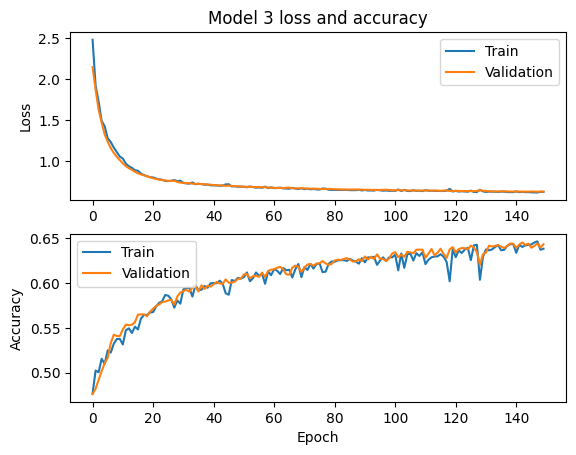

In [52]:
plotModelHistory(history3,3)

In [53]:
test_loss, test_acc = model.evaluate(validationODG)
print("sequential model validation test accuracy: "+str(test_acc))

test_loss, test_acc = model2.evaluate(validationODG)
print("model2 validation test accuracy: "+str(test_acc))

test_loss, test_acc = model3.evaluate(validationODG)
print("model3 validation test accuracy: "+str(test_acc))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - binary_accuracy: 0.6365 - loss: 0.6683
sequential model validation test accuracy: 0.6361817121505737
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 426ms/step - binary_accuracy: 0.8409 - loss: 0.4111
model2 validation test accuracy: 0.8531831502914429
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - binary_accuracy: 0.6344 - loss: 0.6325
model3 validation test accuracy: 0.6434447765350342


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - binary_accuracy: 0.4086 - loss: 1.1879 - val_binary_accuracy: 0.5992 - val_loss: 0.6577
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - binary_accuracy: 0.5856 - loss: 0.6515 - val_binary_accuracy: 0.6257 - val_loss: 0.6704
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - binary_accuracy: 0.6478 - loss: 0.6278 - val_binary_accuracy: 0.6364 - val_loss: 0.6251
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - binary_accuracy: 0.6288 - loss: 0.6285 - val_binary_accuracy: 0.6517 - val_loss: 0.6221
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - binary_accuracy: 0.5770 - loss: 0.6561 - val_binary_accuracy: 0.6586 - val_loss: 0.6184
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - binary_accuracy: 0.6363 - loss: 0.6247 - val_binary_accuracy: 0.6615 - val_loss: 0.6227
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - binary_accuracy: 0.6243 - loss: 0.6297 - val_binary_accuracy: 0.6683 - val_loss: 0.6040
Epoch 8/50
60

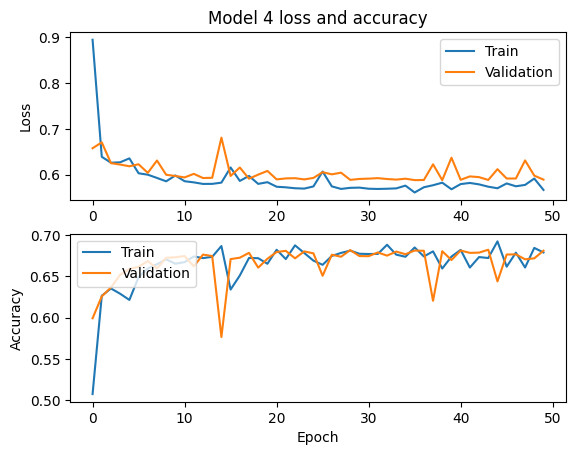

In [75]:
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
input3 = tf.keras.layers.Input(shape=(21,), name="x_profile")
input4 = tf.keras.layers.Input(shape=(13,), name="y_profile")
input5 = tf.keras.layers.Input(shape=(13,21), name="cluster")
# flatCluster = tf.keras.layers.Flatten()(input5)
inputList = [input5]
inputs = tf.keras.layers.Concatenate()(inputList)
stack = tf.keras.layers.Conv1D(32,(3),input_shape=(13,21))(inputs)
stack = tf.keras.layers.Flatten()(stack)
stack = tf.keras.layers.Dense(10,activation='relu')(stack)
stack = tf.keras.layers.Dense(10)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model4 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

history4 = model4.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=50)
plotModelHistory(history4, 4)

In [90]:
validation_dir = "./tf_records1000DanielWithTiming/tfrecords_validation/"
train_dir = "./tf_records1000DanielWithTiming/tfrecords_train/"
x_feature_description: list = ['x_size','z_global','y_profile','x_profile','cluster']
trainODG = OptimizedDataGenerator(tf_records_dir=train_dir,load_records=True, x_feature_description=x_feature_description,time_stamps=[17,18,19])
validationODG = OptimizedDataGenerator(tf_records_dir=validation_dir,load_records=True, x_feature_description=x_feature_description,time_stamps=[17,18,19])
# trainODG._parse_tfrecord_fn()

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - binary_accuracy: 0.5010 - loss: 0.7548 - val_binary_accuracy: 0.6343 - val_loss: 0.6546
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - binary_accuracy: 0.6259 - loss: 0.6349 - val_binary_accuracy: 0.6394 - val_loss: 0.6251
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - binary_accuracy: 0.6325 - loss: 0.6114 - val_binary_accuracy: 0.6693 - val_loss: 0.6062
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - binary_accuracy: 0.6626 - loss: 0.5964 - val_binary_accuracy: 0.6735 - val_loss: 0.6011
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - binary_accuracy: 0.6269 - loss: 0.6155 - val_binary_accuracy: 0.6789 - val_loss: 0.5939
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - binary_accuracy: 0.6466 - loss: 0.5987 - val_binary_accuracy: 0.6774 - val_loss: 0.5948
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - binary_accuracy: 0.6796 - loss: 0.5780 - val_binary_accuracy: 0.6796 - val_loss: 0.5882
Epoch

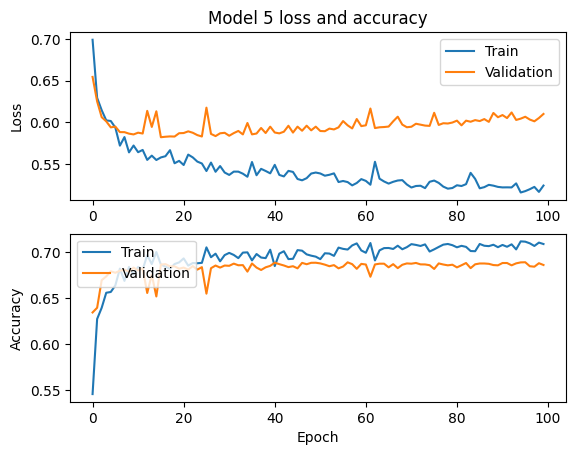

In [98]:
input1 = tf.keras.layers.Input(shape=(1,), name="z_global")
input2 = tf.keras.layers.Input(shape=(1,), name="x_size")
input3 = tf.keras.layers.Input(shape=(21,), name="x_profile")
input4 = tf.keras.layers.Input(shape=(13,), name="y_profile")
input5 = tf.keras.layers.Input(shape=(13,21,3), name="cluster")
# flatCluster = tf.keras.layers.Flatten()(input5)
inputList = [input5]
inputs = tf.keras.layers.Concatenate()(inputList)
stack = tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(13,21,3))(inputs)
# stack = tf.keras.layers.MaxPool2D((2,2))(stack)
# stack = tf.keras.layers.Conv2D(64,(3,3),activation='relu')(stack)
stack = tf.keras.layers.Flatten()(stack)
stack = tf.keras.layers.Dense(10,activation='relu')(stack)
stack = tf.keras.layers.Dense(10)(stack)
output = tf.keras.layers.Dense(1,activation='sigmoid')(stack)

model5 = tf.keras.Model(inputs=inputList, outputs=output)

# model.summary()

model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

history5 = model5.fit(x=trainODG,validation_data=validationODG, callbacks=callbacks,epochs=100)
plotModelHistory(history5, 5)